# Principal Component Analysis (PCA)

© MIT Kevin Patel

## Origin

This is a small Jupyter notebook I made to deliver a short lecture on principal component analysis (PCA) to my EE 516 Pattern Recognition class. I decided I wanted to implement PCA and run it during the presentation. I decided on implementing PCA (even though I was not required to) because years ago I realized that I learn math and mathematical algorithms best after implementing them in code. Additionally I thought running PCA during my presentation and making a publicly available Jupyter notebook on the subject would be more memorable and useful than a slideshow alone (which our group also made).

## What is Principle Component Analysis (PCA)?

PCA is an unsupervised learning method to transform multi dimensional data to a lower dimensional representation. Here are some of the reasons one might use an algorithm such as PCA:
- Many learning algorithms suffer from the "curse of dimensionality" and so tend to suffer in performance with data of very high dimensionality.
- The ability to transform data to a lower dimensional representation is also useful for simpler learning algorithms that assume variable independence or cannot take variable interactions into account (such as Naive Bayes).
- Lower dimensional representations often have less noise than higher dimensional representations.
- A lower dimensional representation can be used to decompose a data to visualize it and reason about it.

## How does PCA work?

PCA is what it sounds like - it extracts so-called "principle components" from a $m \times n$ matrix of data $\textbf{X}$. Intuitively it does this by **finding the orthogonal combination of vectors that explain the greatest amount of variance**.

If you recall from linear algebra, we can transform points in space into a new space using a linear comibination of a set of orthogonal vectors. The smallest set of such vectors are the _eigenvectors_. The eigenvectors are actually the basis vectors of an _eigenspace_ which all the data is in. Using the eigenvectors we can view all the data points as linear combinations of the eigenvectors in the eigenspace. This is how we transform the data.

The final piece of the puzzle is the reduction in dimensionality. In order to achive this, PCA only keeps the best $k$ eigenvectors to perform the transform. How does it do this? Recall that every eigenvector is unit-length, but is associated with an integer _eigenvalue_. If the eigenvectors are the dimensions of the eigenspace, the eigenvalues are the magnitudes of the "stretch" in each direction. 

By ranking the eigenvectors by eigenvalue descending, and choosing the top $k$ eigenvectors. We get the basis vectors / dimensions of the eigenspace that explain the most variance. We use these to perform a transform of the original data to this reduced eigenspace. So there is some loss of information, but by choosing the best eigenvectors we minimize the risk. Additionally there are often noise-reduction benefits in removing low variance dimensions.

## PCA Algorithm

First choose a data matrix $\textbf{X}$ with $m$ rows (data points) and $n$ columns (dimensions) and decide on the the number of principle components $k$ to decompose it to

1. Compute the covariance matrix of $\textbf{X}$: $\Sigma=\frac{1}{n-1}((\textbf{X} - \bar{\textbf{x}})^T(\textbf{X} - \bar{\textbf{x}}))$
    , where $\bar{\textbf{x}}$ is the mean vector  $\bar{\textbf{x}} = [\bar{\textbf{x}}_1 \bar{\textbf{x}}_2 ... \bar{\textbf{x}}_n]^T$

2. Compute the correlation matrix: $\varrho = \textbf{D}^{-1}\Sigma\textbf{D}^{-1}$, where: $\textbf{D}=\sqrt{diag(\Sigma)}$

3. Perform an eigen decomposition of the correlation matrix,  $\varrho$

4. Choose the $k$ eigenvectors with the largest eigenvalues and construct the $n \times k$ eigenvector projection matrix $\textbf{W}$. The eigenvectors are $n \times 1$ vectors, so $\textbf{W}$ is constructed by simply concatenating the $k$ column eigenvectors into a matrix

5. Get the transformed data $\textbf{Y}$ using the projection matrix $\textbf{W}$: $\textbf{Y}=\textbf{X}\textbf{W}$

## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits

In [2]:
def principal_component_analysis(feat_matrix, num_components):
    # corelation_matrix = np.matrix(np.nan_to_num(np.corrcoef(feat_matrix.T)))
    # Compute correlation matrix
    covariance = np.matrix(np.cov(feat_matrix.T))
    covariance_diagonal = np.asarray((covariance.diagonal()))[0]
    D = np.matrix(np.power(np.diag(covariance_diagonal), .5))
    D_inv = np.matrix(np.linalg.pinv(D))
    corelation_matrix = np.matrix(D_inv * covariance * D_inv)

    # Perform eigendecomposition of the correlation matrix
    eig_vals, eig_vecs = np.linalg.eig(corelation_matrix)
    
    # Make a sorted list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda x: x[0], reverse=True)

    # Choose top k eigenvectors and create the n by k projection matrix
    chosen = [np.array(eig_pair[1]).T[0] for eig_pair in eig_pairs[:num_components]]
    projection = np.matrix(np.stack(chosen, axis=1))

    return feat_matrix.dot(projection) # Project to new space

## Handwritten Digits

Here I'll show an example that applies the above PCA function to a dataset of handwritten digits from scikit-learn using both two and three principle components. The data are in the form of 8 by 8 pixel intensity arrays (one 64 length integer vector per image):

In [3]:
digits = load_digits()
data = np.matrix(digits.data)

### 2D

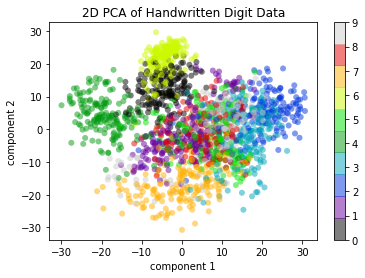

In [4]:
%matplotlib inline
projection = principal_component_analysis(data, 2)
proj1 = np.array(projection[:, 0]).T[0]
proj2 = np.array(projection[:, 1]).T[0]

plt.scatter(proj1, proj2,
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('2D PCA of Handwritten Digit Data')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 3D

<IPython.core.display.Javascript object>


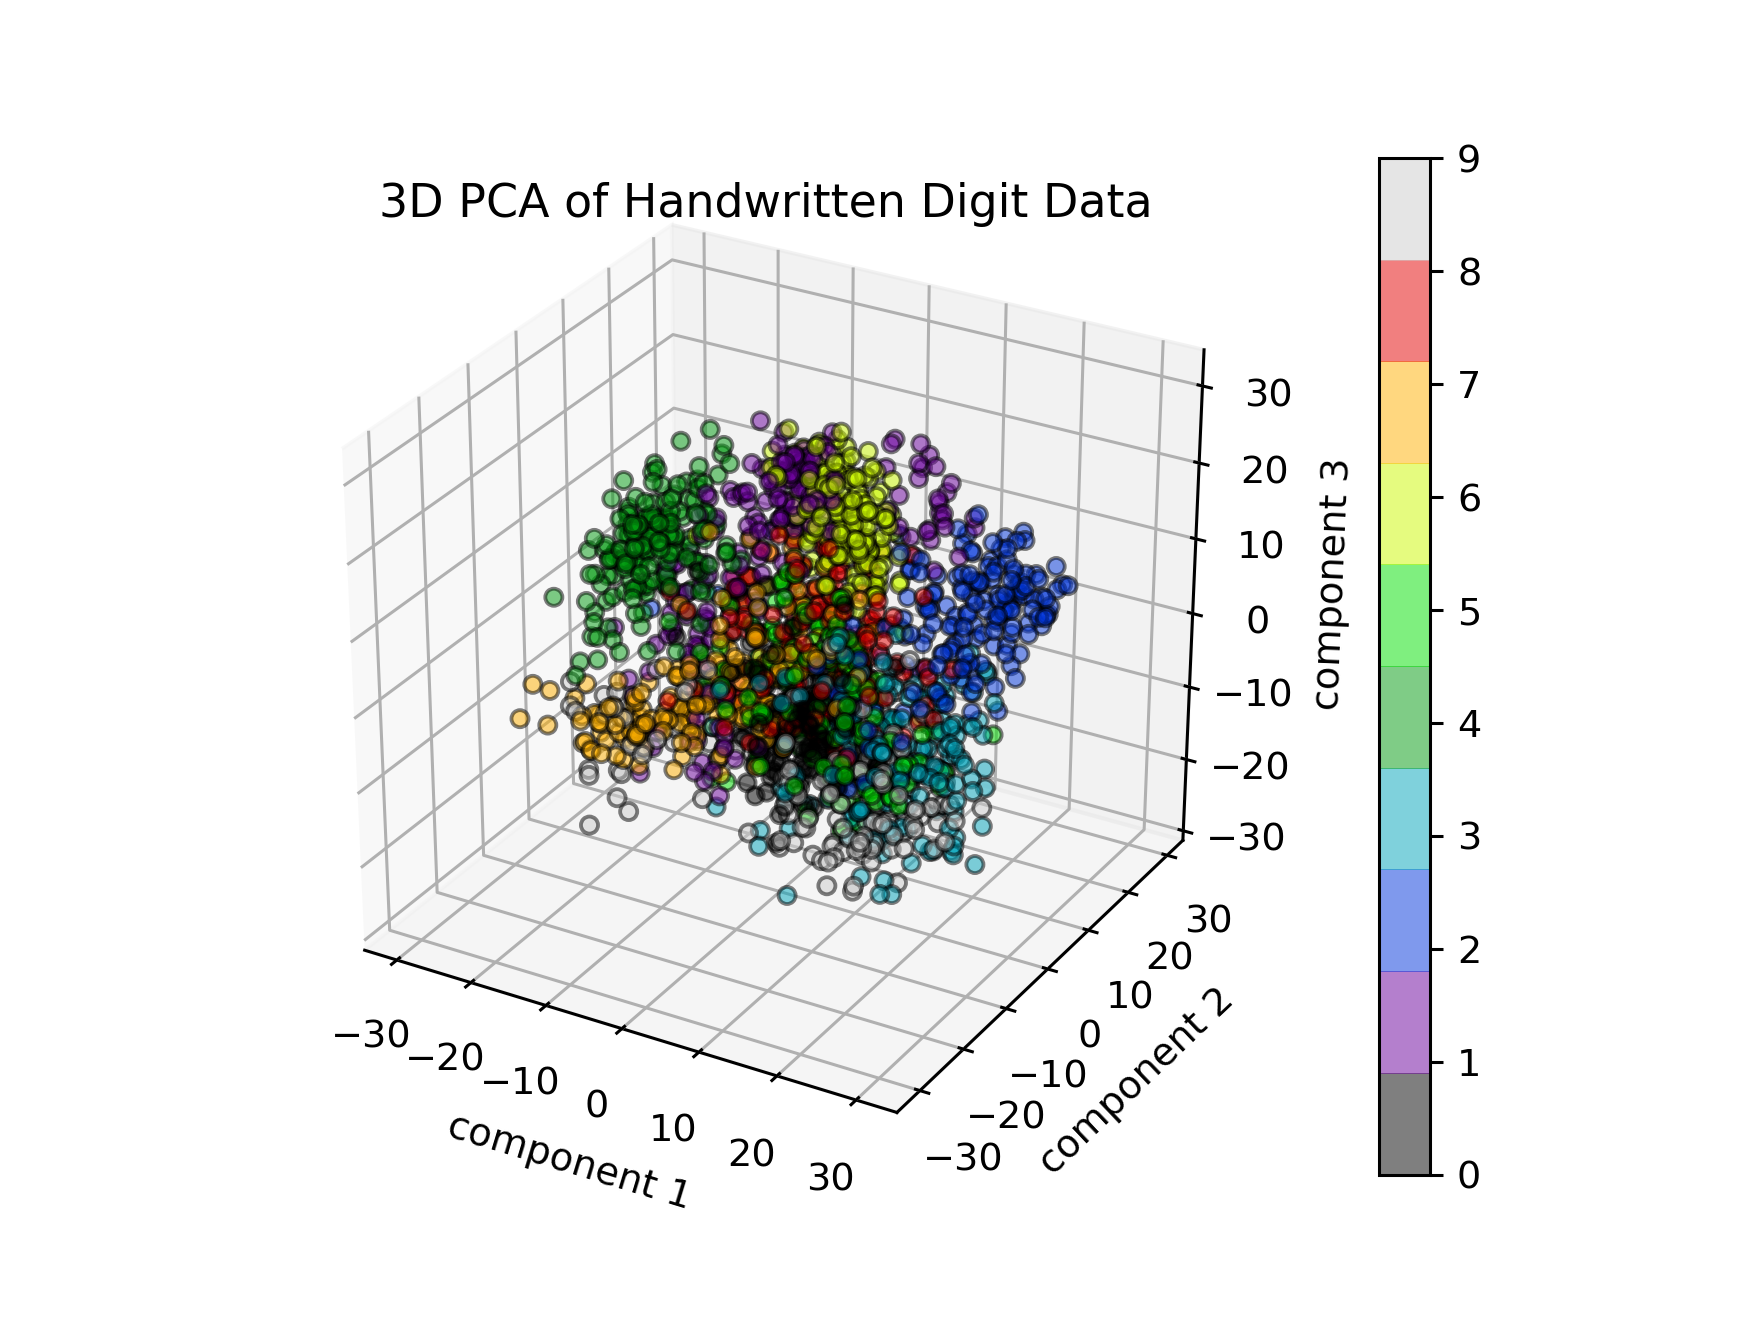

In [5]:
%matplotlib nbagg
projection = principal_component_analysis(data, 3)
proj1 = np.array(projection[:, 0]).T[0]
proj2 = np.array(projection[:, 1]).T[0]
proj3 = np.array(projection[:, 2]).T[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D PCA of Handwritten Digit Data')
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
p = ax.scatter(proj1, proj2, proj3,
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10));
fig.colorbar(p);